## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## Importing the Dataset
We will import the dataset, print its shape as well as few rows.

In [2]:
dataset = pd.read_csv('temp_datalab_records_linkedin_company.csv',low_memory=False)
print(dataset.shape)
dataset.head(3)

(2426196, 14)


,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


## Extracting the desired columns
We below extract the columns that will help us towards our data analysis. We reprint the data shape and few rows.

In [3]:
dataset = pd.read_csv('temp_datalab_records_linkedin_company.csv',usecols=[0,1,2,3,4,6])
print(dataset.shape)
dataset.head(3)

(2426196, 6)


,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,industry
0,58329,2015-09-14,Goldman Sachs,552254,38124,Investment Banking
1,58329,2015-09-15,Goldman Sachs,552862,38141,Investment Banking
2,58363,2015-09-16,United Technologies,59157,14982,Aviation & Aerospace


## Plotting the Data
Next we find a total count of the industry and plot the top 50 industries (on x-axis) vs its total count of entries (i.e., rows) in the dataset (on y-axis). 

The dataset has data for a total of  140 industries


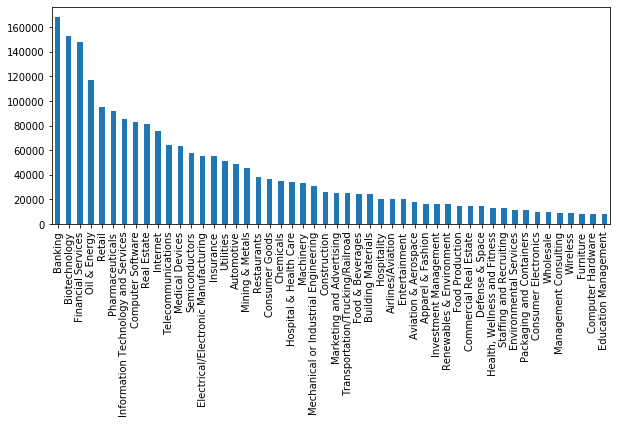

In [4]:
countIndustry = dataset['industry'].nunique()
print("The dataset has data for a total of ",countIndustry, "industries")
industryDist = dataset['industry'].value_counts()
industryDist.iloc[:50,].plot.bar(figsize=(10, 4))
plt.show()

## Filtering the data for a particular industry
We now filter the dataset and extract only the data for 'Banking' sector. We find a total count of the Banks and plot the top 50 Banks on x-axis vs its total count of entries (i.e., rows) on y-axis. 

The Dataset set has data for a total of  335  banks.


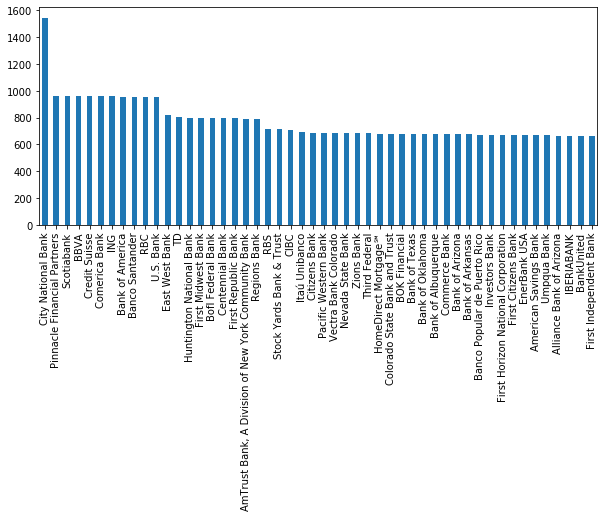

In [5]:
isBanking = dataset[dataset['industry']=='Banking']
countBanks = isBanking['company_name'].nunique()
print("The Dataset set has data for a total of " , countBanks , " banks.")
BankDist = isBanking['company_name'].value_counts()
BankDist.iloc[:50,].plot.bar(figsize=(10, 4))
plt.show()

## Extracting an individual company's data for analysis 
Let's extract the data for 'Pinnacle Financial Partners' only for further analysis. We can do the same analysis for any other company by JUST changing 'Pinnacle Financial Partners' to that company's name as mentioned in the company_name column in the first line of code below.

In [6]:
compName = dataset[dataset['company_name']=='Pinnacle Financial Partners']
compName['company_name'].value_counts()
compName = compName.reset_index(drop=True)
compName.head()

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,industry
0,59128,2015-09-21,Pinnacle Financial Partners,1672,387,Banking
1,59128,2015-09-22,Pinnacle Financial Partners,1673,387,Banking
2,59128,2015-09-23,Pinnacle Financial Partners,1676,387,Banking
3,59128,2015-09-24,Pinnacle Financial Partners,1678,387,Banking
4,59128,2015-09-25,Pinnacle Financial Partners,1679,387,Banking


## Processing the dates

In [7]:
compName.loc[:, 'as_of_date'] =  pd.to_datetime(compName['as_of_date'])
compName.loc[:, 'Year'] = compName['as_of_date'].dt.year
compName.loc[:, 'Month'] = compName['as_of_date'].dt.month
compName.loc[:, 'day'] = compName['as_of_date'].dt.day

In [8]:
import datetime
compName['as_of_date'].max()
may_1_2016 = datetime.datetime(2016, 5, 1)
print(compName.shape)
compName.head(3)

(1017, 9)


,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,industry,Year,Month,day
0,59128,2015-09-21,Pinnacle Financial Partners,1672,387,Banking,2015,9,21
1,59128,2015-09-22,Pinnacle Financial Partners,1673,387,Banking,2015,9,22
2,59128,2015-09-23,Pinnacle Financial Partners,1676,387,Banking,2015,9,23


We add below a new column by concatenating the 'Year' and 'Month' column.

In [9]:
compName['Year'] = compName['Year'].astype(str).str.zfill(4)
compName['Month'] = compName['Month'].astype(str).str.zfill(2)
compName['New_column'] = compName[['Year','Month']].apply('-'.join, axis=1)
compName.head(3)

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,industry,Year,Month,day,New_column
0,59128,2015-09-21,Pinnacle Financial Partners,1672,387,Banking,2015,09,21,2015-09
1,59128,2015-09-22,Pinnacle Financial Partners,1673,387,Banking,2015,09,22,2015-09
2,59128,2015-09-23,Pinnacle Financial Partners,1676,387,Banking,2015,09,23,2015-09


## Plotting the trends
We next plot the count of employees on the platform against the 'Year-Month' on primary y-axis while the count of followers on secondary y-axis.

Text(0.5, 0, 'Year-Month')

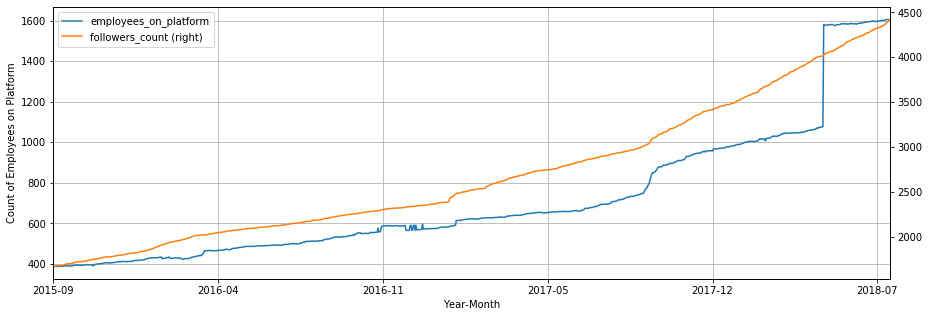

In [10]:
fig, ax = plt.subplots()
compName.plot(ax=ax, x='New_column', y='employees_on_platform',figsize=(15,5), grid=True)
compName.plot(ax=ax, x='New_column', y='followers_count',secondary_y=True, figsize=(15,5), grid=True)
ax.set_ylabel('Count of Employees on Platform')
ax.set_xlabel('Year-Month')

## Stock Analysis
We next do stock analysis for the chosen company based on its historical stock price data.

In [11]:
compName.sort_values(by=['as_of_date'])
compName = compName.reset_index(drop=True)
compName.head(3)

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,industry,Year,Month,day,New_column
0,59128,2015-09-21,Pinnacle Financial Partners,1672,387,Banking,2015,09,21,2015-09
1,59128,2015-09-22,Pinnacle Financial Partners,1673,387,Banking,2015,09,22,2015-09
2,59128,2015-09-23,Pinnacle Financial Partners,1676,387,Banking,2015,09,23,2015-09


### Downloading the stocks
We download the stock price history for a longer duration. This is, if we want to change the name of the company, or if we want to do analysis for a longer period of time (extended data) later, we will not need to modify the code.

In [12]:
stock = yf.download("PNFP", start='2014-01-01', end='2019-12-31')
stock['Date'] = stock.index
stock = stock.reset_index(drop=True)
stock.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
0,32.810001,32.970001,32.500000,32.529999,30.437090,90600,2013-12-31
1,32.500000,32.650002,31.750000,31.860001,29.810198,147900,2014-01-02
2,31.860001,32.139999,31.790001,31.969999,29.913118,70100,2014-01-03


## Merging the data
We next merge the closing price of the stock from the downloaded data with the selected columns from our dataset based on data.

In [13]:
merge_data = compName.merge(stock, left_on='as_of_date', right_on='Date')
filteredData = merge_data[['as_of_date', 'followers_count', 'employees_on_platform', 'Close']]
filteredData = filteredData.rename(columns={'as_of_date': 'Date'})
filteredData.head(3)

,Date,followers_count,employees_on_platform,Close
0,2015-09-21,1672,387,47.950001
1,2015-09-22,1673,387,47.599998
2,2015-09-23,1676,387,47.700001


## Regression analysis

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm = LinearRegression()
X = filteredData[['followers_count', 'employees_on_platform']]
y = filteredData[['Close']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = lm.fit(X_train, y_train)
model.coef_

array([[ 0.0141312 , -0.01802383]])

#### From the regression analysis we see that the company stocks have a tendency to gain value with an increase in the number of followers. On the contrary, the stocks price will decrease as the number of employees increase. This indirectly hints to the increased costs with an increase in the count of employees.

## Accuracy

In [18]:
model.score(X_test, y_test)

0.530991792148138

#### We can see above an accuracy of 53%. A linear model may not capture full power of data but we selected here for interpretability to show relevant weight of both the coefficients. A feedforward neural-network can prove a better option to explore features within the data.